In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(1, 'src/')
import utilities
import config
import csv

from fastai import *
from fastai.text import *

In [2]:
bs = 48
num_workers = 8

In [3]:
torch.cuda.set_device(0)

In [4]:
class_bunch = load_data('.', 'DATA/class_databunch', bs=bs, num_workers=num_workers)

In [5]:
class_bunch.show_batch()

text,target
xxbos ssbmrank 2016 : 11 - 15 ^ xxmaj name | xxmaj rank | xxmaj last xxmaj year | xxmaj change xxrep 7 - | xxrep 6 - | xxrep 10 - | xxrep 8 - xxmaj drunk xxmaj sloth | 100 | n / a | xxup new 4 % | 99 | n / a | xxup new xxmaj nightmare | 98 | n / a | xxup,0
xxbos xxup mfw xxmaj describing a xxmaj customer 's xxmaj build xxmaj list xxmaj to xxmaj him and xxmaj he asks if i 'm xxmaj autistic ^ xxup g&&g shell xxup vfc poly carb piston xxup xxunk xxmaj gen 1 xxmaj zinc xxmaj gears xxup g&&p xxmaj piston xxmaj head xxup xxunk xxmaj spring xxmaj plastic xxunk xxmaj cracked xxup xxunk clear nozzle xxmaj no o - rings xxunk wiring,1
"xxbos xxmaj stealing xxmaj creation i have not played on old school for a while now because i feel like there is n't many new mini games coming out , i think they were the most popular thing back in the day , xxmaj stealing creation was so successful and popular when it came out and i think if we had stealing creation it would attract more players to come",1
"xxbos xxmaj the xxmaj outrageously xxmaj false xxmaj charges of xxmaj perjury xxmaj against xxmaj hillary xxmaj clinton ^ i 'm pretty simple , but it sure seemed like she lied and it sure seemed like she set up an email server to skirt xxup foia i believe both of these things are true and i 'm willing to bet most every single person also believes that these are true",0
"xxbos xxmaj world xxmaj of xxmaj beer xxmaj asks xxmaj interns xxmaj to xxmaj eat , xxmaj drink xxmaj and xxmaj hop xxmaj around xxmaj globe : xxmaj world of xxmaj beer , a xxmaj tampa - based bar and restaurant chain , is looking for interns willing to travel the globe , tasting beer and documenting their experiences across social media for four months . ^ xxmaj that 's",1


In [6]:
learn_c = text_classifier_learner(class_bunch, AWD_LSTM, drop_mult=0.3) #.to_fp16()
learn_c.load_encoder('fine_tuned_enc')
learn_c.freeze()

In [7]:
learn_c.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


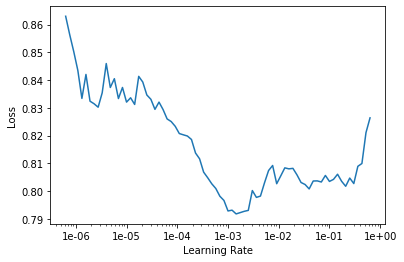

In [8]:
learn_c.recorder.plot(skip_end=10)

In [9]:
learn_c.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.668536,0.668882,0.586246,02:26


In [10]:
learn_c.save('first')

In [11]:
learn_c.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (205663 items)
x: TextList
xxbos xxmaj will xxmaj washington allow the pursuit of positive foreign policy ? ^ xxmaj no , we need to bomb them .,xxbos xxmaj calabasas for sale early ... 2k ^ xxmaj that 's ludicrous,xxbos xxmaj darvish offered $ 1,000 to minor leaguers if they could take him deep during his latest xxup bp . ^ xxmaj it 's a motivational tactic .,xxbos xxmaj how many xxup cia agents work in xxmaj ottawa ? ^ xxmaj asking the tough questions that most redditors wo n't !,xxbos xxmaj what items every office should have to promote productivity ? ^ a big guy banging drums xxunk
y: CategoryList
1,0,0,1,0
Path: .;

Valid: LabelList (51417 items)
x: TextList
xxbos xxmaj go figure , right ? ^ xxmaj and this guy is totally not homophobic or racist .,xxbos i really like the xxup acr according to stats ^ xxmaj so , your favorite pistol is also the xxup acr right ?,xxbos xxmaj google xxmaj chrome is the most popular web browser in xxm

In [12]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.617482,0.614833,0.655192,02:45


In [13]:
learn_c.save('2nd')

In [14]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.591615,0.592697,0.680709,04:02


In [15]:
learn_c.save('3rd')

In [16]:
learn_c.unfreeze()
learn_c.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.553526,0.600683,0.683373,05:19
1,0.537218,0.600215,0.682576,05:18


In [17]:
learn_c.save('clas')